# **Problem**

## **Critical risk analysis for intraday trading using widely used algorithm like Black-Scholes, Random-Walk and comparison of those algorithm with the help of TWAP MCAD strategy.**

In [ ]:
!ipython profile locate default

Unable to create process using 'C:\Users\Dinya ANTONY\anaconda3\python.exe "C:\Users\Dinya ANTONY\anaconda3\Scripts\ipython-script.py" profile locate default'


In this project we will get the stock options data from refinitiv. In order to do this we will use the eikon package. You can find installation steps below.


In [ ]:
pip install eikon

In [ ]:
import eikon as ek
ek.set_app_key('Your ref key')

In [ ]:
df2 = ek.get_news_headlines('AAPL.O')
df2.shape

(10, 4)

In [ ]:
df = ek.get_timeseries('AAPL.O',start_date="2012-01-01",end_date="2022-12-31")

df

AAPL.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,302259098.259098
2012-01-04,14.809985,14.7657,14.617128,14.642843,56155,260244692.244692
2012-01-05,14.948199,14.929628,14.7382,14.819628,58360,271267491.267491
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,318385966.385966
2012-01-09,15.27677,15.061771,15.048199,15.196417,80332,394023562.023562
...,...,...,...,...,...,...
2022-12-23,132.415,131.86,129.64,130.92,541275,63814893.0
2022-12-27,131.41,130.03,128.72,131.38,608331,69007830.0
2022-12-28,131.0275,126.04,125.87,129.67,762246,85438391.0


In [ ]:
df3 = ek.get_timeseries('AAPL.O',start_date="2012-10-01",end_date="2022-12-31", interval='minute')

df3

AAPL.O,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2022-10-17 16:24:00,141.6,141.411255,141.4988,141.56,884,97939
2022-10-17 16:25:00,141.61,141.53,141.55,141.595,981,104902
2022-10-17 16:26:00,141.6,141.504878,141.595,141.565,642,54813
2022-10-17 16:27:00,141.69,141.5601,141.5601,141.69,1111,130477
2022-10-17 16:28:00,141.74,141.553589,141.69,141.7192,947,96638
...,...,...,...,...,...,...
2022-12-30 23:56:00,130.04,130.02,130.04,130.04,8,120
2022-12-30 23:57:00,130.05,130.01,130.04,130.04,10,1450
2022-12-30 23:58:00,130.05,130.01,130.01,130.03,9,34


In [ ]:
intraday=df3
intraday.to_csv('intraday.csv',index = True)

In [ ]:
TenYears= df
TenYears.to_csv('10_years.csv',index = True)

In [ ]:
df2 = ek.get_data( ['AAPL.O'],
    fields = [
        'TR.TotalCurrentAssets',
        'TR.BIDPRICE',
        'TR.ASKPRICE', 
        'ADJUST_CLS',
        'TR.DpsCommonStock'
    ],
    parameters = {
        'Curn': 'EUR',
        'SDate': '2022-10-13',
        'EDate': '2022-12-29',
        'Frq': 'D'
    }
)


df2 = pd.DataFrame(df2[0])
df2

,Instrument,Total Current Assets,Bid Price,Ask Price,ADJUST_CLS,DPS - Common Stock Primary Issue
0,AAPL.O,115106796480,146.229799,146.260496,129.61,0.725628
1,AAPL.O,115106796480,142.380566,142.514324,<NA>,0.725628
2,AAPL.O,115106796480,144.745328,144.755493,<NA>,0.725628
3,AAPL.O,115106796480,145.949726,145.959876,<NA>,0.725628
4,AAPL.O,115106796480,147.273016,147.28325,<NA>,0.725628
5,AAPL.O,115106796480,146.498838,146.509059,<NA>,0.725628
6,AAPL.O,115106796480,149.351092,149.422086,<NA>,0.725628
7,AAPL.O,115106796480,151.468386,151.478513,<NA>,0.725628
8,AAPL.O,115106796480,152.930092,152.940128,<NA>,0.725628
9,AAPL.O,139736605950,148.367744,148.377667,<NA>,0.928791


In [ ]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2
Sklearn version: 1.0.2
Statsmodels version: 0.12.2


In [ ]:
#loading temp data
df = pd.read_csv('10_years.csv')
df.head()

,Date,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
0,2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08
1,2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08
2,2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08
3,2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08
4,2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2764 non-null   object 
 1   HIGH    2764 non-null   float64
 2   CLOSE   2764 non-null   float64
 3   LOW     2764 non-null   float64
 4   OPEN    2764 non-null   float64
 5   COUNT   2764 non-null   int64  
 6   VOLUME  2764 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2764 non-null   datetime64[ns]
 1   HIGH    2764 non-null   float64       
 2   CLOSE   2764 non-null   float64       
 3   LOW     2764 non-null   float64       
 4   OPEN    2764 non-null   float64       
 5   COUNT   2764 non-null   int64         
 6   VOLUME  2764 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.3 KB


In [ ]:
#setting up the index
df.set_index(keys='Date',inplace=True)

## **Dataset ready**

In [ ]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08


In [ ]:
df.shape

(2764, 6)

## **Analysing Closing value of stock per day.**

In [ ]:
df['CLOSE'].describe()

count    2764.000000
mean       58.535662
std        47.946462
min        13.947486
25%        24.158119
50%        37.611250
75%        77.183125
max       182.010000
Name: CLOSE, dtype: float64

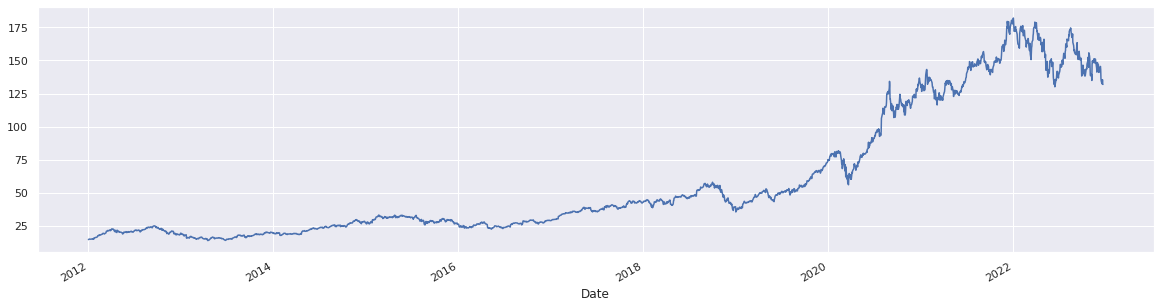

In [ ]:
# The following code is to set to show the flow

from pylab import rcParams
rcParams['figure.figsize'] = 20,5
df['CLOSE'].plot(grid=True)

**A good thing for our model is that for now the min and max for our data is positive.**

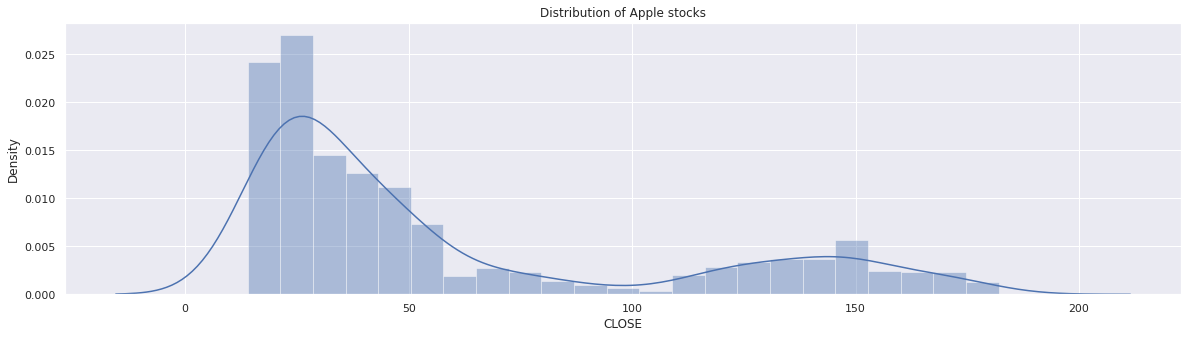

In [ ]:
sns.distplot(df['CLOSE'])
plt.title('Distribution of Apple stocks')
plt.show()

**We get almost a highly left-skewed, let's do a Log transfromation data.**

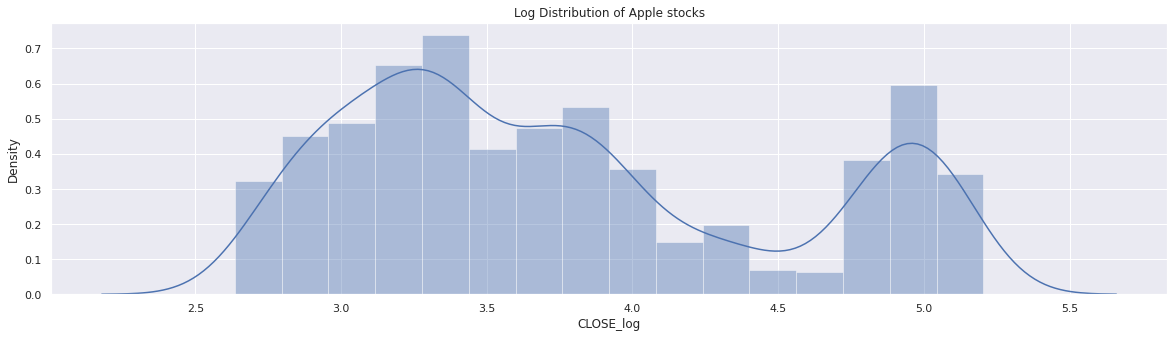

In [ ]:
df['CLOSE_log'] = np.log(df['CLOSE'])
sns.distplot(df['CLOSE_log'])
plt.title('Log Distribution of Apple stocks')
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['CLOSE'].skew())
print("Kurtosis: %f" % df['CLOSE'].kurt())

Skewness: 1.165539
Kurtosis: -0.136809


**We may encounter some outliers on the lower end.**

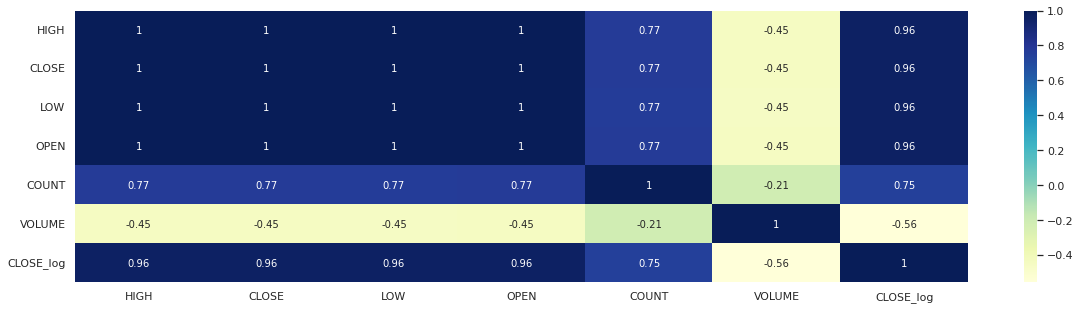

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

**We can see a perfect co-relation amount our variables, except for volume.**

***Moving average (MA)***

A moving average is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. They are 3 types the 10 moving average, the 20 moving average and the 50 moving average. In our case we will use the short term, also know as 10MA.

In [ ]:
# Moving average using closing price and volume
# Calculate moving average
def moving_avg(M):
  arr = df['CLOSE'].to_numpy()
  ma = M  
  i = 0
  # Initialize an empty list to store moving averages
  moving_averages = []
  
  # Loop through the array to consider
  # every window of size 10
  while i < len(arr):
    
    # Store elements from i to i+ma in list to get the current window
    window = arr[i : i + ma]
  
    # Calculate the average of current window
    window_average = round(sum(window) / ma, 2)
      
    # Store the average of current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  return moving_averages

**Considering only trading days, eg, 252 for 365 days in a year and 21 each month. Taking MA for 365, 30, 120, 240 days.**

Text(0.5, 1.0, 'APPLE moving average')

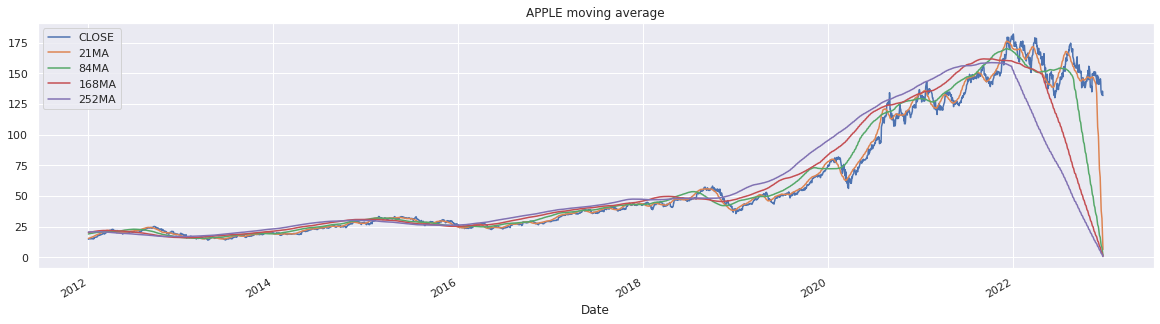

In [ ]:
df['21MA'] = moving_avg(21)
df['84MA'] = moving_avg(84)
df['168MA'] = moving_avg(168)
df['252MA'] = moving_avg(252)
df[['CLOSE', '21MA',	'84MA',	'168MA',	'252MA'	]].plot().set_title('APPLE moving average')

Text(0.5, 1.0, 'APPLE moving average')

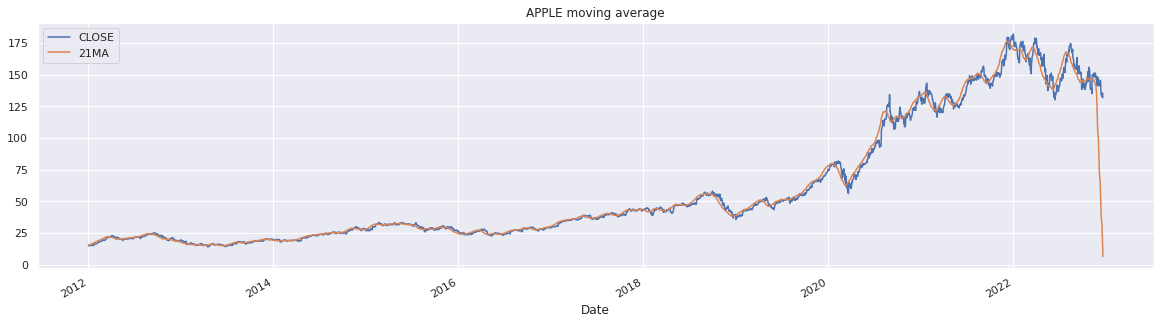

In [ ]:
df[['CLOSE','21MA'	]].plot().set_title('APPLE moving average')

**The 21 days moving average gives us a clear trend without much noice, however if we cosider this it also means that a change is excepted after 21/2, days lag. We will move on with 21 pallet as based for each month for 10 years data we have.** 

**We will try to handle this lag later as we move on with EMA.**

**Changes in the price.** Let's calculate returns on our closing prices.

In [ ]:
#Getting daliy return rates
df['returns'] = np.log(df['CLOSE']/df['CLOSE'].shift())

Text(0.5, 1.0, 'APPLE returns every day')

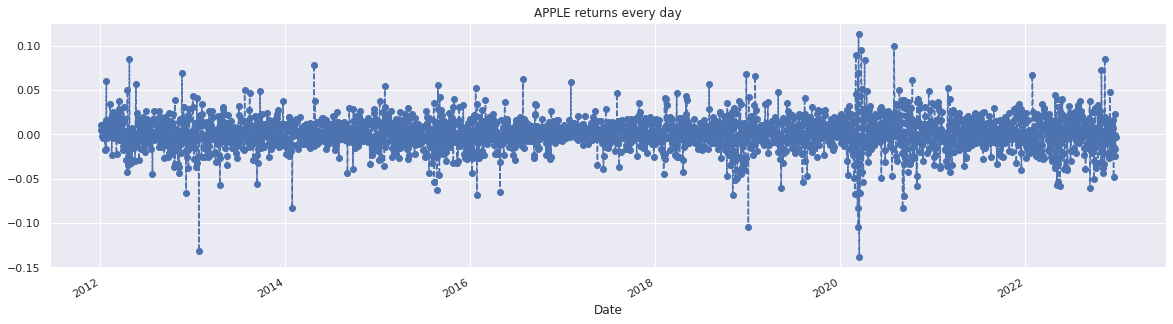

In [ ]:
df['returns'].plot(linestyle='--', marker='o').set_title('APPLE returns every day')

**We see that for the apple the changes 10% to low 15% over the years. Mostly between 5% on either sides.** 

**Let's see the disribution to understand the point better.**

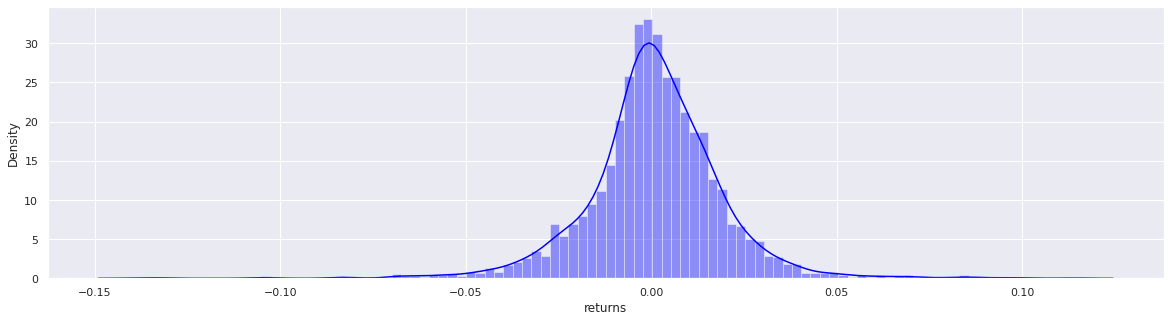

In [ ]:
sns.distplot(df['returns'].dropna(), bins=100, color='blue')

**We get a normal distribution, mostly within 5%**

In [ ]:
print("Skewness: %f" % df['returns'].skew())
print("Kurtosis: %f" % df['returns'].kurt())

Skewness: -0.277015
Kurtosis: 5.790824


**The rolling volality for the same on 21 days span over 252  trading days.**



In [ ]:
df['Rolling_volatility'] = df['returns'].dropna().rolling(21).std()*np.sqrt(252)

Text(0.5, 1.0, 'Apple Rolling Volatility over Price')

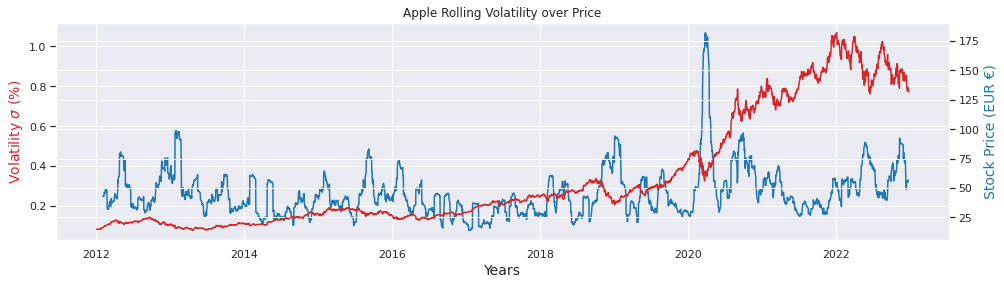

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['Rolling_volatility'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df['CLOSE'], color='tab:red')
ax.set_ylabel("Volatility $\sigma$ (%)", color="tab:red", fontsize=14)
ax2.set_ylabel("Stock Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Rolling Volatility over Price')

 ***Point data we have, our rolling volatility over the 21 days by year, approximately 252 trading days.* We see that expecpt for 2020 7% rise, volatility is ranging between 1-4%.**

**We will next use random walk to create our strike price list and values.**

**Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, we will use it for black Scholes stock follows a random walk request.**

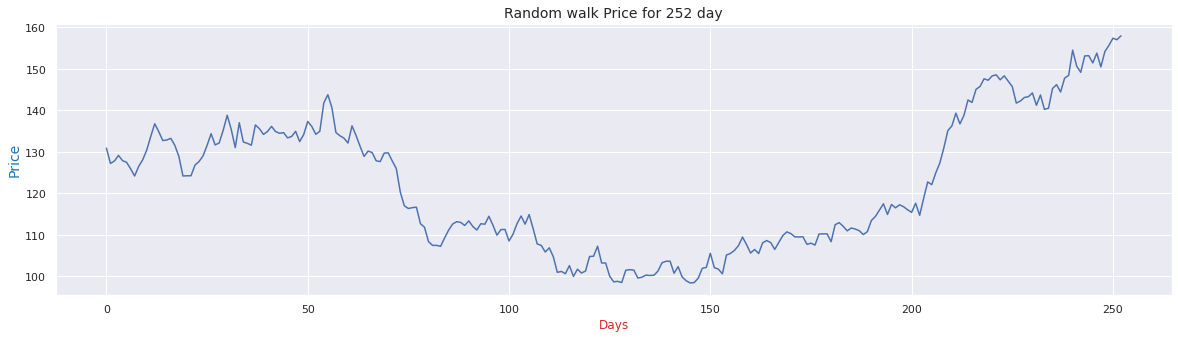

In [ ]:
T = 252
count = 0
price_list = [] # the list to store strike price
last_price = df['CLOSE'][-1] # just using the last closing.

price = last_price * (1 + np.random.normal(0, df.returns.std())) # getting price value by multipling it with daliy volatility.
price_list.append(price)

for i in range(T):
  if count == 252:
    break
  price = price_list[count]* (1 + np.random.normal(0, df.returns.std()))
  price_list.append(price)
  count += 1

plt.plot(price_list)
plt.ylabel("Price",color="tab:blue",fontsize=14) 
plt.xlabel("Days", color="tab:red")
plt.title('Random walk Price for 252 day', fontsize = 14)
plt.show()

Expected price:  132.2
5% lower limit:  77.01266064646805
5% upper limit:  206.12654050117598


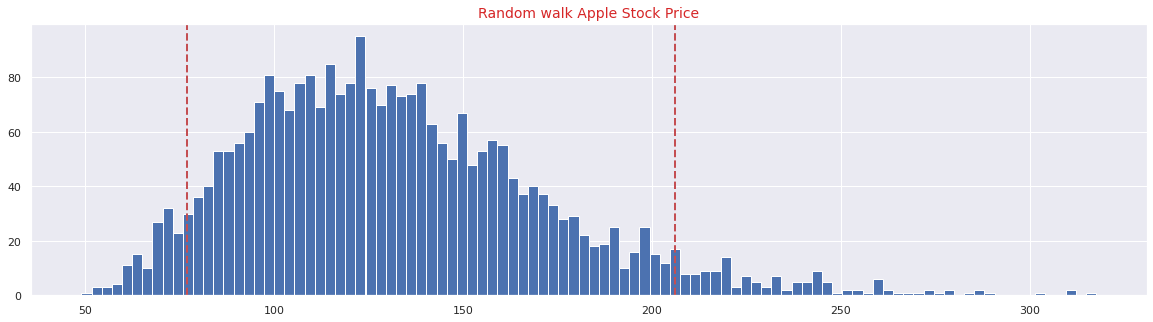

In [ ]:
max_iterations =  df.shape[0] # iteration same as record value
randomwalk = pd.DataFrame()
last_price_list = [] # the list to store strike price
last_price = df['CLOSE'][-1] # just using the last closing.

for i in range(max_iterations):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, df.returns.std()))
    price_list.append(price) 

    for y in range(T): # no.of days T
        if count == 252: # geting the price for 252 records
            break
        price = price_list[count]* (1 + np.random.normal(0, df.returns.std())) # getting price value by multipling it with daliy volatility.
        price_list.append(price)
        count += 1
        
    randomwalk[i] = price_list
    last_price_list.append(price_list[-1])
      
print("Expected price: ", round(np.mean(last_price_list),2))
print("5% lower limit: ",np.percentile(last_price_list,5))
print("5% upper limit: ",np.percentile(last_price_list,95))
plt.hist(last_price_list,bins=100)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.title("Random walk Apple Stock Price",color="tab:red",fontsize=14) 
plt.show()

**We have the strick price as 132.61 year-end and there is a 5% changes for it going lower than 79 and 5% it goes above 206**

In [ ]:
df['Ran_Price'] = pd.DataFrame(last_price_list).values
df.head(3)

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,21MA,84MA,168MA,252MA,returns,Rolling_volatility,Ran_Price
Date,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,15.35,18.93,20.11,20.56,NaN,NaN,110.383272
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.43,19.00,20.16,20.58,0.005360,NaN,136.576686
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.51,19.06,20.22,20.60,0.011041,NaN,112.257646



**How much value do we put at risk by investing in apple?**



Text(0.5, 1.0, 'APPLE risk')

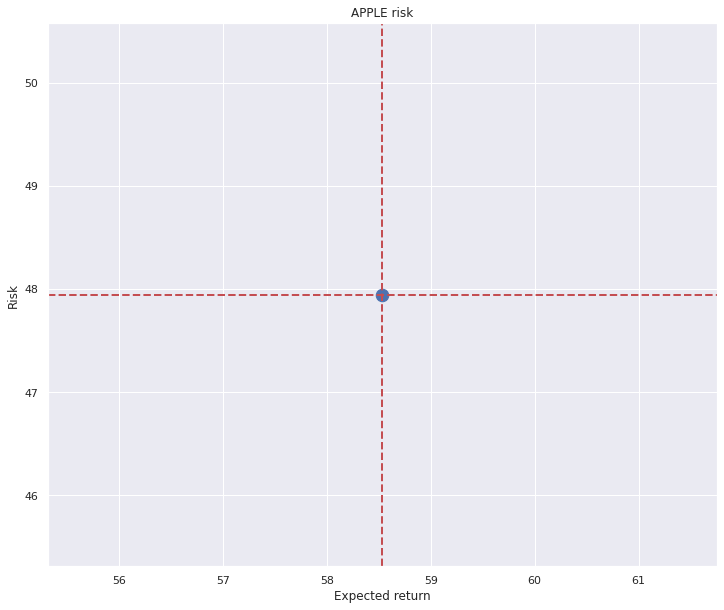

In [ ]:
#mean v/s std for returns
rets = df['CLOSE'].dropna()
area = np.pi*50
#plotting the area
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area) 
plt.axhline(rets.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(rets.mean(), color='r', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('APPLE risk')

**At the risk of 47% there is an return of 58.5%.**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

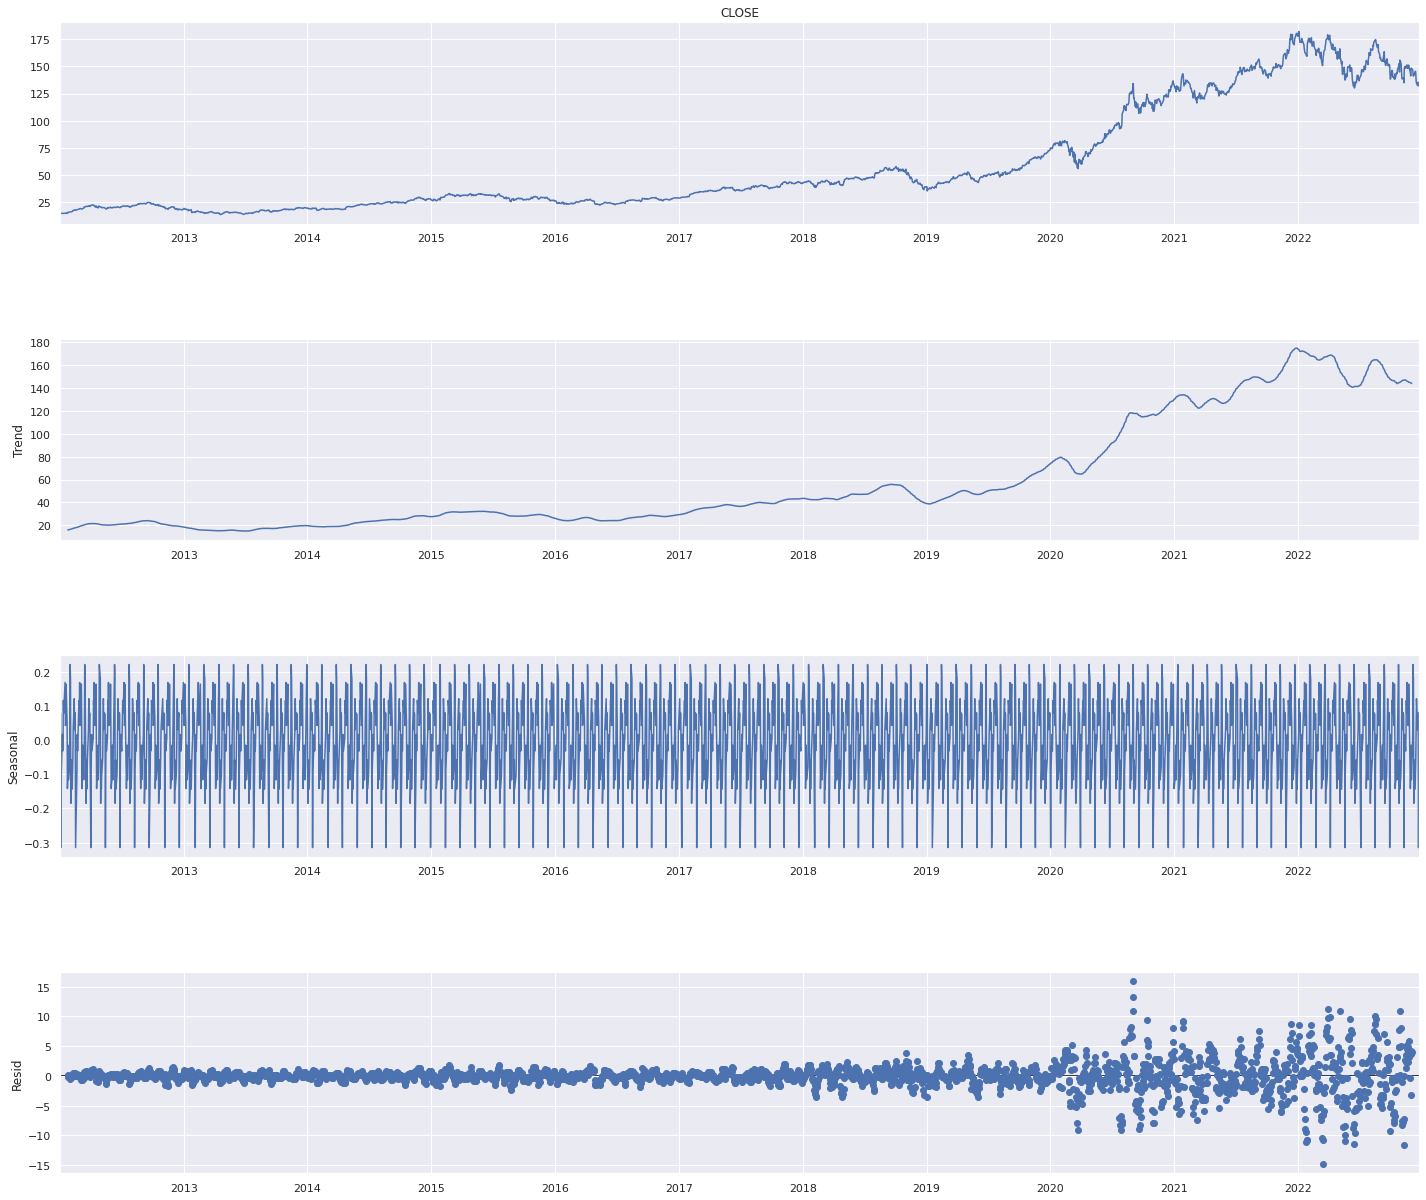

In [ ]:
result = seasonal_decompose(df['CLOSE'], model='additive', period = 30)
fig = result.plot()  
fig.set_size_inches(20, 19)

**We can see a clear seasonality and rising trend and and high residual at the 2020-2022 span.**

# **BSM**

### **The Black-Scholes equations revolutionized option pricing when the paper was published by Mryon Scholes and Fischer Black in 1973.**

---
**It surely has a few assumptions:** 
*   Interest rate and Volatility are constant through time
*   Stock follows a random walk
*   Stock do not have transaction cost or pays dividends.
*   The option can be only executed at the expiration date.







**Going into the equation itself we see that the model gives out two important outputs and call and put values.**

 

 
C
a
l
l
=
S
0
N
(
d
1
)
−
N
(
d
2
)
K
e
−
r
T

 

P
u
t
=
N
(
−
d
2
)
K
e
−
r
T
−
N
(
−
d
1
)
S
0

 

d
1
=
l
n
(
S
K
)
+
(
r
+
σ
2
2
)
T
σ
√
T
d
2
=
d
1
−
σ
√
T

 

S : current asset price

K: strike price of the option

r: risk free rate 

T : time until option expiration 

sigma/σ: annualized volatility of the asset's returns 

In [ ]:
#  Print out the results
from scipy.stats import norm
from scipy.optimize import minimize_scalar

N = norm.cdf

#Calculating the values of d1 and d2 as well as the calls and puts
def BSM_CALLS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)
#Calculating the values of call
def BSM_PUTS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1) 
#Calculating the values of puts
def implied_vol(opt_value, S, K, T, r, type_='call'):
  def call_obj(sigma):
    return abs(BSM_CALLS(S, K, T, r, sigma) - opt_value)
  #Calculating the values of volatility 
  def put_obj(sigma):
    return abs(BSM_PUTS(S, K, T, r, sigma) - opt_value)
    
  if type_ == 'call':
    res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
    return res.x
  elif type_ == 'put':
    res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
    return res.x
  else:
    raise ValueError("type_ must be 'put' or 'call'")


**Tested function**

**Observe a stock in the market with a current price of 100 there is an option for sale for the right to buy the stock in exactly 1 year from now for 115 , the option  costs $132.61 and the risk free rate rate is 5%.**

In [ ]:
S = 132.61
K = 115
T = 21
r = 0.05
sigma = 0.45

C = BSM_CALLS(S, K, T, r, sigma)
P = BSM_PUTS(S, K, T, r, sigma)
iv = implied_vol(C, S, K, T, r)
print(iv)

0.44999817460062475


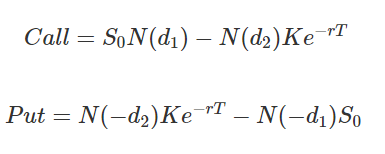

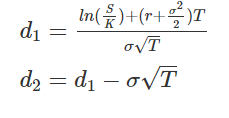

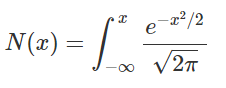

In [ ]:
#  Print out the results
from math import sqrt, exp, log, pi

#Calculating the values of d1 and d2 as well as the calls and puts
def d(sigma, S, K, r, t):
    d1 = 1 / (sigma * sqrt(t)) * ( log(S/K) + (r + sigma**2/2) * t)
    d2 = d1 - sigma * sqrt(t)
    return d1, d2

def call_price(sigma, S, K, r, t, d1, d2):
    C = norm.cdf(d1) * S - norm.cdf(d2) * K * exp(-r * t)
    return C


def put_price(sigma, S, K, r, t, d1, d2):
    P = -norm.cdf(-d1) * S + norm.cdf(-d2) * K * exp(-r * t)
    return P
#  Option parameters
  
S = 132.61
K = 115
T = 21
r = 0.05
sigma = 0.45 

def implied_volatility_call(C, S, K, T, r):

  #  Tolerances
  tol = 1e-3
  epsilon = 1

  #  Variables to log and manage number of iterations
  count = 0
  max_iter = len(df)

  #  We need to provide an initial guess for the root of our function
  vol = 0.50

  while epsilon > tol:
      #  Count how many iterations and make sure while loop doesn't run away
      count += 1
      if count >= max_iter:
          print('Breaking on count')
          break;

      #  Log the value previously calculated to computer percent change
      #  between iterations
      orig_vol = vol

      #  Calculate the vaule of the call price
      d1, d2 = d(vol, S, K, r, t)
      function_value = put_price(vol, S, K, r, t, d1, d2) - C

      #  Calculate vega, the derivative of the price with respect to
      #  volatility
      vega = S * norm.pdf(d1) * sqrt(t)

      #  Update for value of the volatility
      vol = -function_value / vega + vol

      #  Check the percent change between current and last iteration
      epsilon = abs( (vol - orig_vol) / orig_vol )
      return vol

def implied_volatility_put(P, S, K, T, r):

#  Tolerances
  tol = 1e-3
  epsilon = 1

#  Variables to log and manage number of iterations
  count = 0
  max_iter = len(df)

#  We need to provide an initial guess for the root of our function
  vol = 0.50

  while epsilon > tol:
    #  Count how many iterations and make sure while loop doesn't run away
    count += 1
    if count >= max_iter:
      print('Breaking on count')
      break;

    #  Log the value previously calculated to computer percent change
    #  between iterations
    orig_vol = vol

    #  Calculate the vaule of the put price
    d1, d2 = d(vol, S, K, r, t)
    function_value = call_price(sigma, S, K, r, t, d1, d2) - P

    #  Calculate vega, the derivative of the price with respect to
    #  volatility
    vega = S * norm.pdf(d1) * sqrt(t)

    #  Update for value of the volatility
    vol = -function_value / vega + vol

    #  Check the percent change between current and last iteration
    epsilon = abs( (vol - orig_vol) / orig_vol )
    return vol


In [ ]:
#  Print out the results
print('Sigma = ', implied_volatility_call(C, S, K, T, r))

Sigma =  3.317833340992684


**Going into the equation itself we see that the model gives out two important outputs and call and put values.**

**In order to get call, risk-adjusted strike price  at the time of expiry, i.e N(d2)K e-rt is detected from the current asset price after taking into account the variance through normal distribution. I.e S0N(d1)**

**In the same way to get put., we deduct the current asset price with variance from risk-adjusted strike price at the time of expiry but this time from the negative end of the distribution spectrum.**


Our implied volatility is at 46.77%

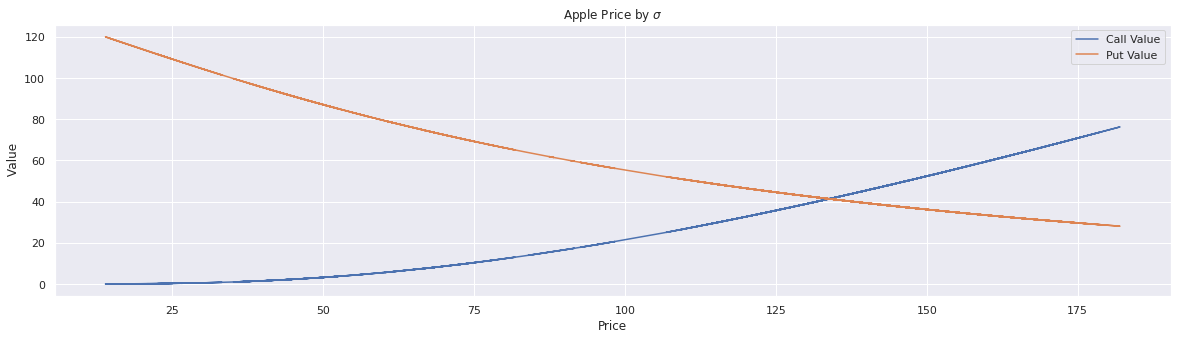

In [ ]:
K = 135
r = 0.15
T = 21/365
sigma = 3.31

S = df['CLOSE'].to_numpy()

calls = [BSM_CALLS(s, K, T, r, sigma) for s in S]
puts = [BSM_PUTS(s, K, T, r, sigma) for s in S]

plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('Price')
plt.ylabel(' Value')
plt.title('Apple Price by $\sigma$')
plt.legend()

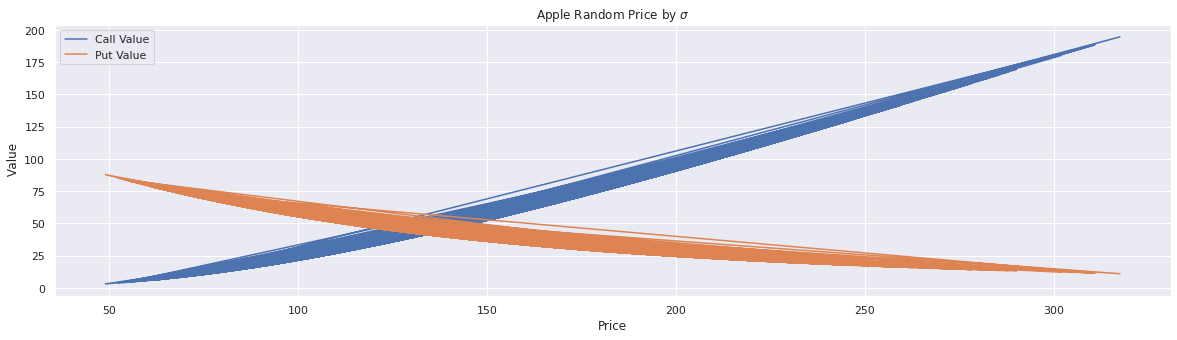

In [ ]:
K = 135
r = 0.15
T = 21/365
sigma = 3.31

S = df['Ran_Price'].to_numpy()

call = [BSM_CALLS(s, K, T, r, sigma) for s in S]
put = [BSM_PUTS(s, K, T, r, sigma) for s in S]

plt.plot(S, call, label='Call Value')
plt.plot(S, put, label='Put Value')
plt.xlabel('Price')
plt.ylabel(' Value')
plt.title('Apple Random Price by $\sigma$')
plt.legend()

 **We get the volatility smile here with our data and our random price set. The volatility smile is related to the fact that options at different strikes have different levels of implied volatility. It is calculated implied volatility using Newton's method** 

Newton's method is a method for finding increasingly improved approximations to the roots of a function. With implied volatility we're trying to find what value of σ makes our option price.

If we have a function f(x) and its derivative f′(x) we can start with an initial guess and successively improve it with an updated guess by doing:

xn+1=xn−f(xn)f′(xn)
To find the implied volatility, the root we want to find is where our Black-Scholes price matches the market price to some level of precision. We can express that like:





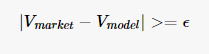

Where ϵ is the level of precision and Vmarket is the market price for the option.

Here, our f(x) function is the Black-Scholes equation for pricing an option:

Vmodel=f(x)=BSM(σ)


In [ ]:
df['calls']= calls
df['puts'] = puts

In [ ]:
S = 100
K = 100
r = 0.15
T = 30/365
sigma = 0.17 

C = df['calls'].to_numpy()
P = df['puts'].to_numpy()
implied_volatility_call = [implied_volatility_call(C, S, K, T, r) for c in C]
implied_volatility_put = [implied_volatility_put(P, S, K, T, r) for p in P]

In [ ]:
implied_volatility_put[0]

array([3.78643568, 3.78381524, 3.77837413, ..., 1.16008232, 1.19736055,
       1.20172182])

In [ ]:
implied_volatility_call[0]

array([0.12570505, 0.12572776, 0.12577626, ..., 1.54345151, 1.47289889,
       1.46486966])

In [ ]:
x = pd.DataFrame(implied_volatility_call[0])
y = pd.DataFrame(implied_volatility_put[0])

In [ ]:
df['implied_volatility_calls'] = x.values
df['implied_volatility_puts'] = y.values

In [ ]:
df['implied_volatility_puts']

Date
2012-01-03    3.786436
2012-01-04    3.783815
2012-01-05    3.778374
2012-01-06    3.773196
2012-01-09    3.773989
                ...   
2022-12-19    1.195715
2022-12-20    1.196537
2022-12-21    1.160082
2022-12-22    1.197361
2022-12-23    1.201722
Name: implied_volatility_puts, Length: 2764, dtype: float64

In [ ]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,21MA,84MA,168MA,252MA,returns,Rolling_volatility,Ran_Price,calls,puts,implied_volatility_calls,implied_volatility_puts
Date,,,,,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,15.35,18.93,20.11,20.56,NaN,NaN,110.383272,0.026503,119.179677,0.125705,3.786436
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.43,19.00,20.16,20.58,0.005360,NaN,136.576686,0.027181,119.101426,0.125728,3.783815
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.51,19.06,20.22,20.60,0.011041,NaN,112.257646,0.028630,118.938946,0.125776,3.778374
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08,2.713747,15.58,19.13,20.27,20.61,0.010400,NaN,130.764680,0.030060,118.784305,0.125824,3.773196
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08,2.712160,15.66,19.19,20.32,20.63,-0.001587,NaN,85.881689,0.029837,118.808011,0.125817,3.773989


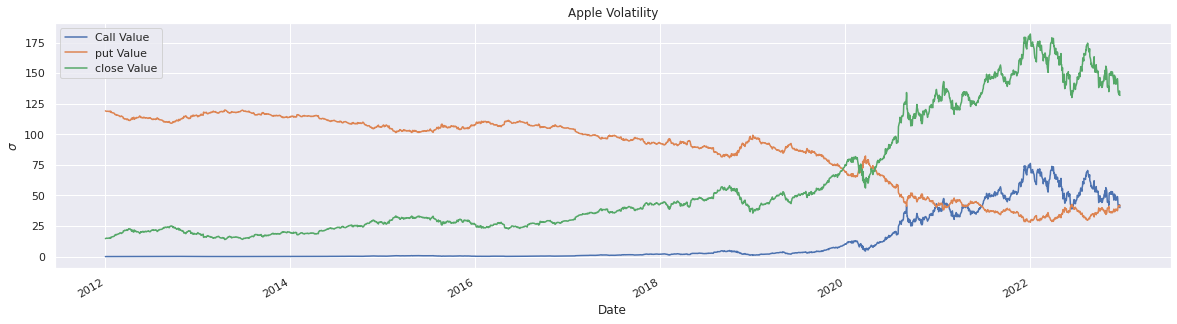

In [ ]:
df.calls.plot(label='Call Value')
df.puts.plot(label='put Value')
df.CLOSE.plot(label='close Value')
plt.ylabel('$\sigma$')
plt.title('Apple Volatility')
plt.legend()

We can see that the call value closes follows the Price and Put goes down then Price goes up.

**Call option**

A call option is the right to buy an asset at a predetermined price.  
 

**Put Option**

A put option is the right to sell and asset at a predetermined price. 

**Next is MCAD, to understand it we needed to know EMA, i.e what it does is by averaging, it gives more value to recent data,, than the ones that are at a distance..**

**Components of MACD**
*To get MACD line we subtract a longer period EMA by a shorter one. For example I have a 10 days EMA and 50 Days EMA, we will do a 10-50.
Signal Line is nothing but the EMA line.*

Here we range it within 10 to 21 days

In [ ]:
# MACD parameters
short_period = 12
long_period  = 21
signal_period = 9
ewm_short=df['CLOSE'].ewm(span=short_period, adjust=False).mean() 
# getting the short term value
ewm_long=df['CLOSE'].ewm(span=long_period, adjust=False).mean() 
# getting the long term value 1 month trading
ewm_short_ran=df['Ran_Price'].ewm(span=short_period, adjust=False).mean()
ewm_long_ran=df['Ran_Price'].ewm(span=long_period, adjust=False).mean() 
MACD=ewm_short-ewm_long 
#Moving average convergence/divergence value
signal_MACD=MACD.ewm(span=signal_period, adjust=False).mean() 
#Moving average convergence/divergence signal will use to know when to trade
bars=MACD-signal_MACD
bar_values=bars.values
bar_index_number=np.arange(0,len(bar_values))

In [ ]:
df['MACD'] = MACD.values
df['signal_MACD'] = signal_MACD.values

In [ ]:
df['VWAP'] = (df.CLOSE * df.VOLUME).cumsum() / df.VOLUME.cumsum()

In [ ]:
# Create TWAP function
def TWAP(dataframe):
    tp = (df['LOW'] + df['CLOSE'] + df['HIGH']+ df['VOLUME']).divide(4)
    return df.assign(twap=(tp.rolling(1).sum().divide(1)))

twap_df = TWAP(df)
df['TWAP'] = twap_df['twap']

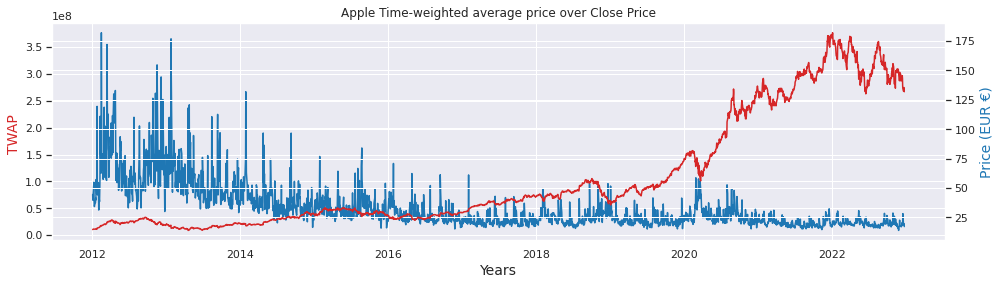

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['TWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("TWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Time-weighted average price over Close Price')
plt.show()

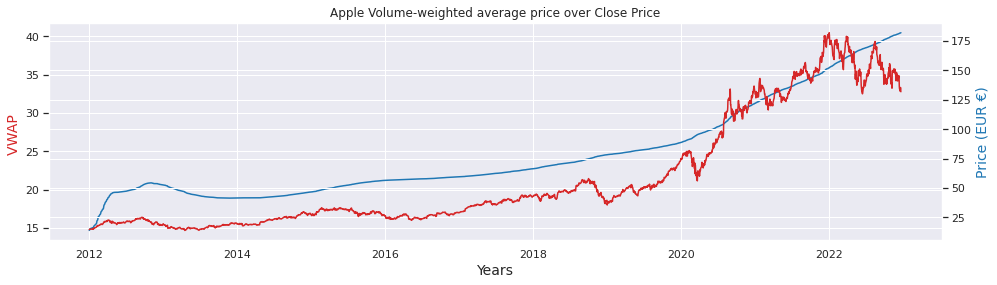

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['VWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df[['CLOSE']], color='tab:red')
ax.set_ylabel("VWAP ", color="tab:red", fontsize=14)
ax2.set_ylabel("Price (EUR €)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Volume-weighted average price over Close Price')
plt.show()

**As we can see here they have a almost co-relation, where as VWAP is inlice with the price model**

**MACD Strategy:**
*   **IF MACD LINE > SIGNAL LINE => BUY THE STOCK**
*   **IF SIGNAL LINE > MACD LINE => SELL THE STOCK**




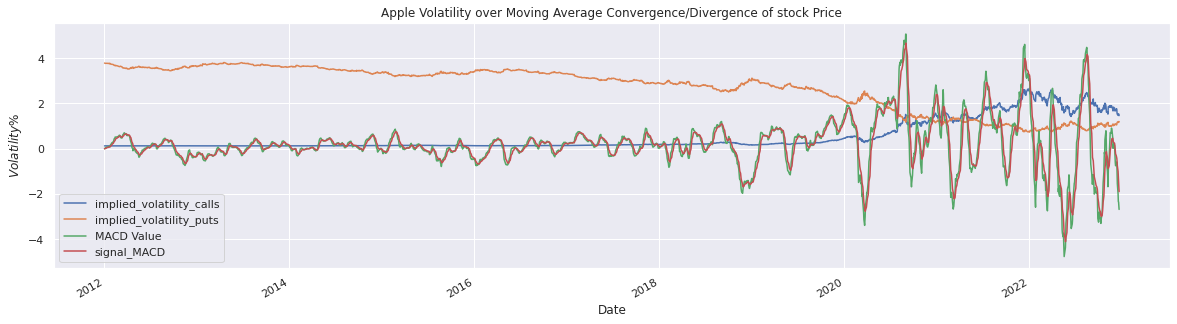

In [ ]:
df.implied_volatility_calls.plot(label='implied_volatility_calls')
df.implied_volatility_puts.plot(label='implied_volatility_puts')
df.MACD.plot(label='MACD Value')
df.signal_MACD.plot(label='signal_MACD') 
plt.ylabel('$Volatility \%$')
plt.title('Apple Volatility over Moving Average Convergence/Divergence of stock Price')
plt.legend() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2012-01-03 to 2022-12-23
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HIGH                      2764 non-null   float64
 1   CLOSE                     2764 non-null   float64
 2   LOW                       2764 non-null   float64
 3   OPEN                      2764 non-null   float64
 4   COUNT                     2764 non-null   int64  
 5   VOLUME                    2764 non-null   float64
 6   CLOSE_log                 2764 non-null   float64
 7   21MA                      2764 non-null   float64
 8   84MA                      2764 non-null   float64
 9   168MA                     2764 non-null   float64
 10  252MA                     2764 non-null   float64
 11  returns                   2763 non-null   float64
 12  Rolling_volatility        2743 non-null   float64
 13  Ran_Price                 2764 non-null   flo

In [ ]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([11, 12]),)


In [ ]:
df.loc[df['returns'].isnull() == True,'returns'] = df['returns'].mode()[0]
df.loc[df['Rolling_volatility'].isnull() == True,'Rolling_volatility'] = df['Rolling_volatility'].mode()[0] 

In [ ]:
df.isnull().sum()

HIGH                        0
CLOSE                       0
LOW                         0
OPEN                        0
COUNT                       0
VOLUME                      0
CLOSE_log                   0
21MA                        0
84MA                        0
168MA                       0
252MA                       0
returns                     0
Rolling_volatility          0
Ran_Price                   0
calls                       0
puts                        0
implied_volatility_calls    0
implied_volatility_puts     0
MACD                        0
signal_MACD                 0
VWAP                        0
TWAP                        0
dtype: int64

**A Sequential model is a plain stack of layers where each layer has exactly one input tensor and one output tensor.**

In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = df[['CLOSE']].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections.**

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2)) #Making the dropout fraction 0.2 drops 20% of the layers.
model.add(LSTM(units=96,return_sequences=True)) #sequential one with 96 units in the output’s dimensionality
model.add(Dropout(0.2)) 
#sequential_3 which is expecting 3 dimensions, adding layers
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

We have initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer.

Making the dropout fraction 0.2 drops 20% of the layers.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('app_stock_pred.h5')

Epoch 1/50
68/68 [==============================] - 18s 166ms/step - loss: 0.0274
Epoch 2/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0233
Epoch 3/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0231
Epoch 4/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0230
Epoch 5/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0233
Epoch 6/50
68/68 [==============================] - 13s 184ms/step - loss: 0.0232
Epoch 7/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0228
Epoch 8/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 9/50
68/68 [==============================] - 11s 165ms/step - loss: 0.0234
Epoch 10/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0227
Epoch 11/50
68/68 [==============================] - 11s 166ms/step - loss: 0.0228
Epoch 12/50
68/68 [==============================] - 11s 168ms/step - loss: 0.0227
Epoch 13/50
6

**Loss (L).** Measure of how far a model’s predictions are from its label. Metric that represents how good/bad a model is. Objective is to find a set of weights and biases that minimize loss. To determine loss, a model defines a loss function. Linear regression models typically use mean squared error while logistic regression models use Log Loss, for loss function.

**Each epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.**

In [ ]:
model = load_model('app_stock_pred.h5')

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_4 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_5 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_6 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_7 (LSTM)               (None, 96)               

**For the first layer we have additional bias term 37632, followed by 74112 there after, hence we have a good working model with high capacity.**

**Accuracy. Calculates the percentage of predicted values (x_test) that match actual values of Close Price.**

16/16 [==============================] - 2s 51ms/step


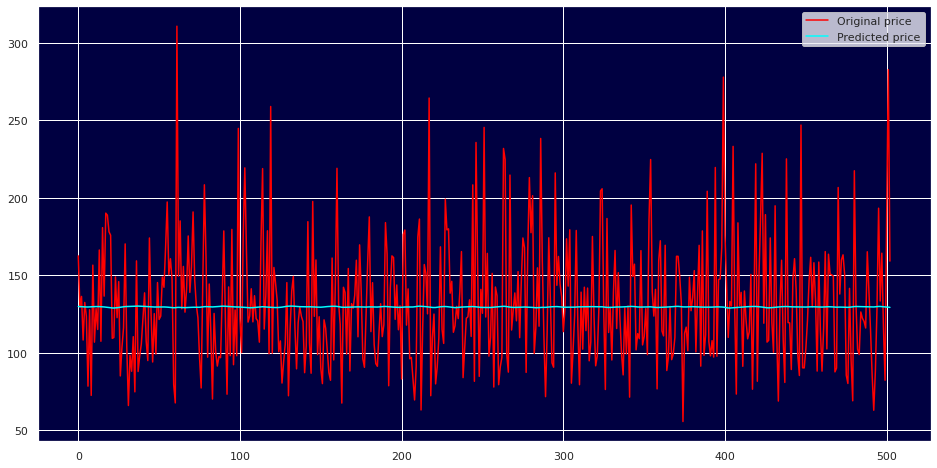

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

## **Inference:**

**A very good prediction result!  We build the ANN to get the max precision value and least error.**

**Change layers, numbers, epochs, and batch_size, will update the prediction and more accurate.**

**Compare this number to the one we calculated using the brute force approach, they are effectively identical. ANN is better accuracy but not speed as hoped, but BSM does. You can verify this number is correct by plugging the imp_vol back into the Black-Scholes formula.**

 

**It took approximately 0.002 seconds when I ran the BSM snippet, comparing this to 5 seconds it took when using the brute force approach. Consider again calculating the implied volatility for 1000 options using both approaches; using Newton Raphson we would be finished in 2 seconds in comparison to well over an hour for brute force approach. A significant increase in speed!**

## **Conclusion**

**The Random price we get small loss and were able to get a very predication, we have made the model so it can take in any variable, currently Price is the one we used. The models give us around 50 or close to 50% accuracy for both test and train model, though it still needs to be improved, and can be done by tuning.**


**TWAP indicator would take trainging and more data for mastering the result with less error, however it can be further imporved to become a vital tool for day traders to have a clear picture and the best conditions to make an informed decision.**

**In the case of our mode the loss is very low, hence it can be used and further imporved.**


**We were able to use EMA too fix the day lag with rolling volality and BSM model gave the result in 3 itermations, BSM is still faster than ANN.**


**Through out thr project and the differnt algorithm we see that as the volality increases the risk also is higher.**


**As in the case of Apple the volality is not hiigher than 5%, hence the overall tarding risk is also low. We were able to train the model using 1 hour interval years data. However futher test can also be done with different intervals 5, 10, 20 minutes to see the changes.**

## **Future Line of work.**

**We were able recommend the use of GRU's or GARCH forecasts for solution to short-term memory as intraday data. That could be the next step for our project. Getting more data and training algorithms for fine tunning the final results**